In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# ***Data Understanding***

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

***Expenses***

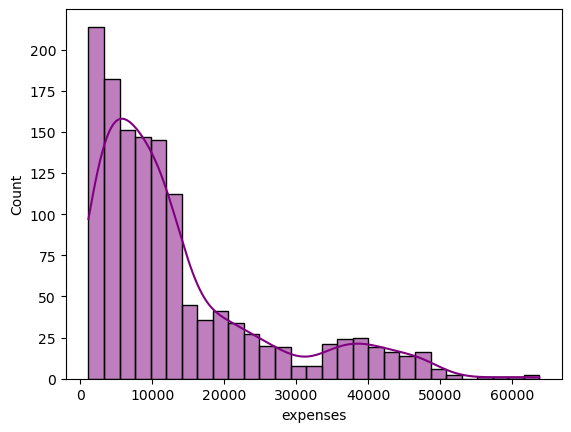

In [25]:
sns.histplot(df["expenses"], kde = True, color = "purple")
plt.show()

***Age***

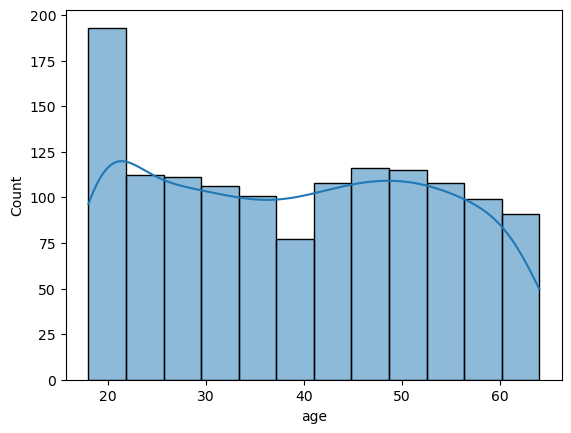

In [14]:
sns.histplot(df["age"], kde = True)
plt.show()

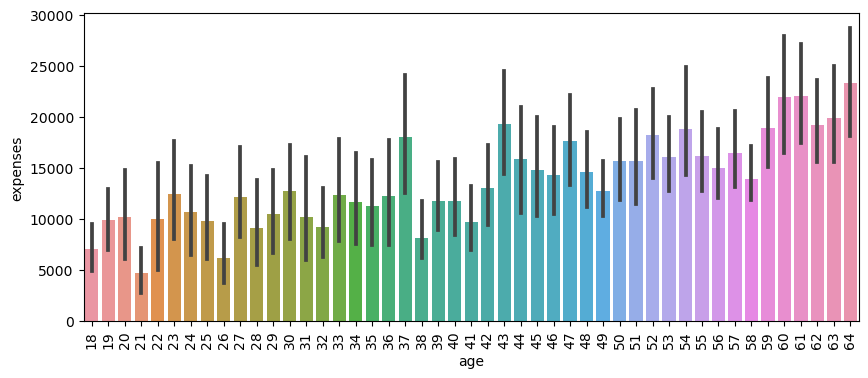

In [22]:
plt.figure(figsize = (10, 4))
sns.barplot(x = df["age"], y = df["expenses"])
plt.xticks(rotation = "vertical")
plt.show()

***Sex***

In [28]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

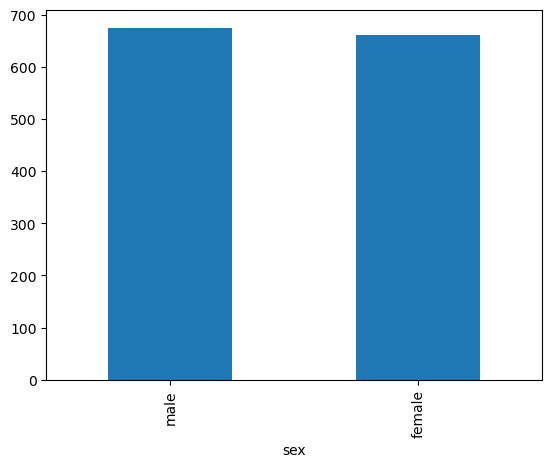

In [30]:
df["sex"].value_counts().plot(kind = "bar")
plt.show()

In [33]:
df.groupby("sex")["expenses"].mean()

sex
female    12569.578897
male      13974.999111
Name: expenses, dtype: float64

***BMI***

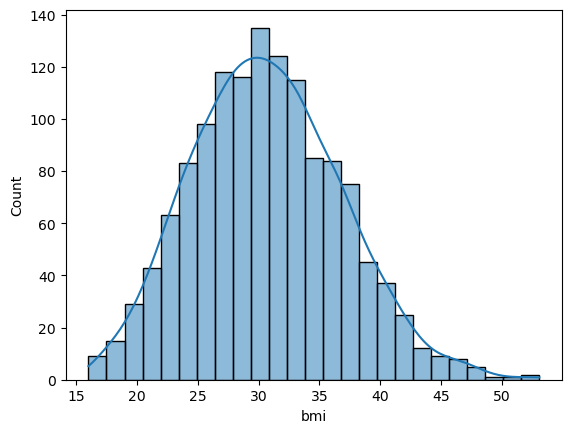

In [36]:
sns.histplot(df["bmi"], kde = True)
plt.show()

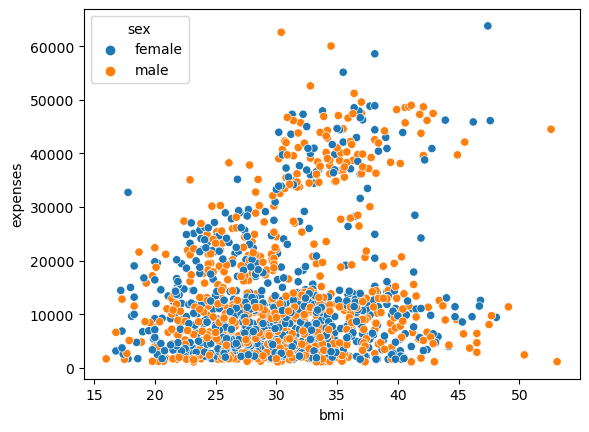

In [37]:
sns.scatterplot(x = df["bmi"], y = df["expenses"], hue = df["sex"])
plt.show()

***Children***

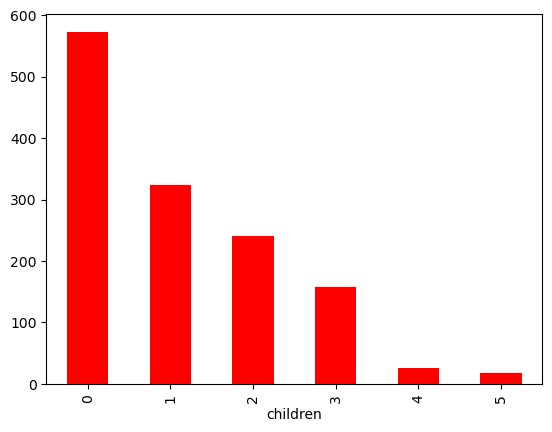

In [41]:
df["children"].value_counts().plot(kind = "bar", color = "red")
plt.show()

In [42]:
df.groupby("children")["expenses"].mean()

children
0    12384.695515
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

***Smoker***

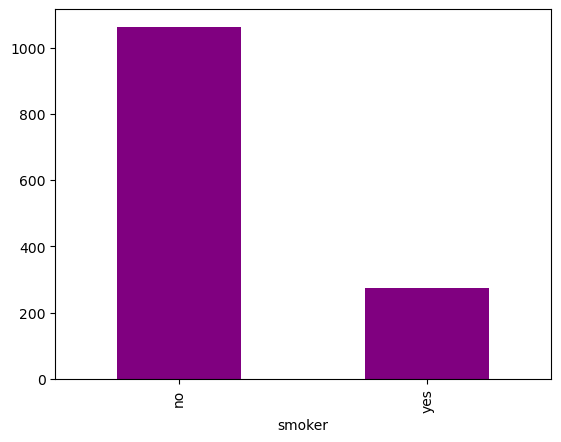

In [48]:
df["smoker"].value_counts().plot(kind = "bar", color = "purple")
plt.show()

In [49]:
df.groupby("smoker")["expenses"].mean()

smoker
no      8440.660461
yes    32050.231971
Name: expenses, dtype: float64

In [50]:
pd.crosstab(df["sex"], df["smoker"], margins = True)

smoker,no,yes,All
sex,,,
female,547,115,662
male,516,159,675
All,1063,274,1337


***Region***

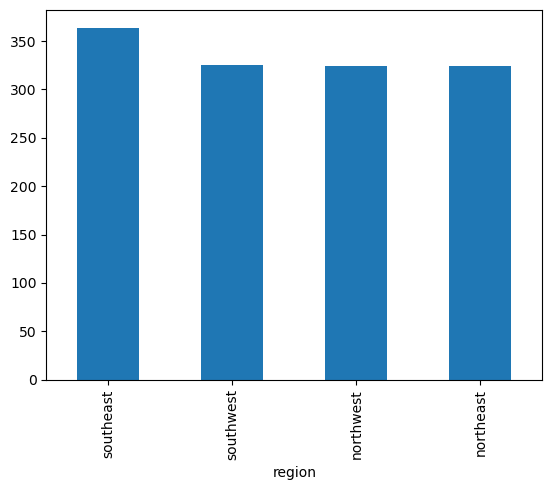

In [53]:
df["region"].value_counts().plot(kind = "bar")
plt.show()

In [54]:
df.groupby("region")["expenses"].mean()

region
northeast    13406.384691
northwest    12450.840648
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [55]:
pd.crosstab(df["sex"], df["region"], margins = True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,160,189,163,675
All,324,324,364,325,1337


In [56]:
pd.crosstab(df["smoker"], df["region"], margins = True)

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
no,257,266,273,267,1063
yes,67,58,91,58,274
All,324,324,364,325,1337


# ***Data Preprocessing***

***Data Cleaning***

In [57]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [58]:
df.describe(include = "object")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [59]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


***Data Wrangling***

In [61]:
df["sex"].replace({"female" : 0, "male" : 1}, inplace = True)
df["smoker"].replace({"no" : 0, "yes" : 1}, inplace = True)

In [71]:
df.drop("region", axis = 1).skew()

age         0.054781
sex        -0.019469
bmi         0.284463
children    0.937421
smoker      1.463601
expenses    1.515391
dtype: float64

In [69]:
df.to_csv("Insurance_Analyzed.csv")